Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Mean:  [0.0145, 0.0325, 0.014, -0.0415, -0.0735, 0.0085, -0.037, -0.019]


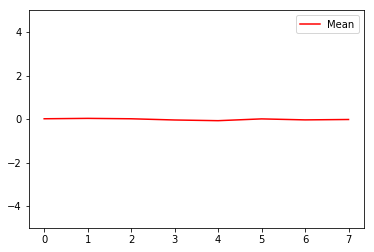


Auto-Correlation of sample generated, for verification:

[[ 1.    -0.003 -0.001  0.01  -0.003  0.005 -0.017 -0.009]
 [-0.003  1.    -0.013 -0.007 -0.016  0.001  0.002  0.009]
 [-0.001 -0.013  1.    -0.02   0.01  -0.003  0.004  0.005]
 [ 0.01  -0.007 -0.02   1.     0.01  -0.005  0.003 -0.013]
 [-0.003 -0.016  0.01   0.01   1.     0.004 -0.     0.001]
 [ 0.005  0.001 -0.003 -0.005  0.004  1.     0.001 -0.   ]
 [-0.017  0.002  0.004  0.003 -0.     0.001  1.    -0.002]
 [-0.009  0.009  0.005 -0.013  0.001 -0.    -0.002  1.   ]]


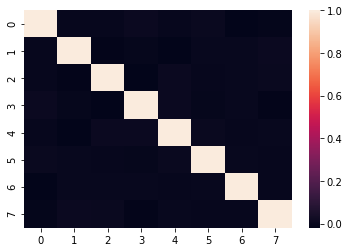

Mean with delay:  [0.0, 0.0075, 0.014, 0.01, -0.0645, 0.0085, 0.0115, -0.01275]


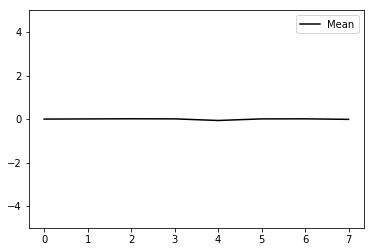


Auto-Correlation of sample generated, for verification:

[[   nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan  1.    -0.004  0.005 -0.007  0.005 -0.    -0.005]
 [   nan -0.004  1.    -0.018 -0.    -0.001 -0.006  0.001]
 [   nan  0.005 -0.018  1.     0.009 -0.     0.015 -0.001]
 [   nan -0.007 -0.     0.009  1.     0.002 -0.012  0.   ]
 [   nan  0.005 -0.001 -0.     0.002  1.     0.008  0.003]
 [   nan -0.    -0.006  0.015 -0.012  0.008  1.    -0.008]
 [   nan -0.005  0.001 -0.001  0.     0.003 -0.008  1.   ]]


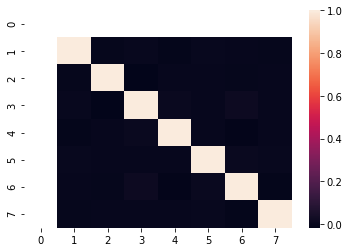



PSD without delay


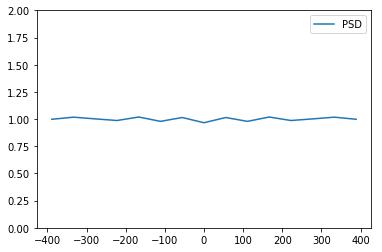

In [6]:
%reset
import matplotlib.pyplot as plt
import numpy as np
import math
import random  
from datetime import datetime
import statistics as st
import sympy as sym
from scipy.fftpack import fft, fftfreq, fftshift
import pandas as pd
import time
import seaborn as sns
np.set_printoptions(2);
random.seed(datetime.now())

np.set_printoptions(3,suppress=True)
n=20000
v=5
N = 10
T = 0.001
Ts = 0.0012

xenc=[[0 for x in range(N)] for y in range(n)];

def wss(x):
    mean = [];
    x = np.transpose(x);
    for i in range(0,int((N*T)/Ts)):  #to verify Means
        mean.append(np.mean(x[i]));
    print('Mean: ',mean);
    plt.plot(mean,label='Mean',color='r')
    plt.ylim(-v,v)
    plt.legend()
    plt.show();
    print('\nAuto-Correlation of sample generated, for verification:\n');
    print(np.corrcoef(x));     
    sns.heatmap(np.corrcoef(x));
    plt.show();

def encode(array):
    for i in range(0,n):
        if array[i][0] == 1 :
            xenc[i][0]=v
        else :
            xenc[i][0]=-v
            
    for i in range(0,n):
        for j in range(1,N):
            if array[i][j-1]^array[i][j] == 0:
                xenc[i][j]=xenc[i][j-1]
            else:
                xenc[i][j] = -xenc[i][j-1]
                
    sampled = [[0 for x in range(int((N*T)/Ts))] for y in range(n)];
    for i in range(0,n):
        for j in range(0,int((N*T)/Ts)):
            sampled[i][j] = xenc[i][int((j*Ts)/T)];
    return sampled;  


def psd(sampled):    
    #### PSD PLOT
    sampled=np.transpose(sampled);
    fig = plt.figure();
    sampled = np.corrcoef(sampled);
    
    to_fft = [];
    for kkk in range(sampled.shape[0]-1,0,-1):
        tmp = np.diag(sampled,kkk);
        to_fft.append(np.mean(tmp));
    for kkk in range(0,sampled.shape[0]):
        tmp = np.diag(sampled,kkk);
        to_fft.append(np.mean(tmp));
    
    Y = fftshift(fft(to_fft));
    freq = fftshift(fftfreq(len(to_fft)))*(1/Ts);
    print('\n\nPSD without delay')
    plt.plot(freq,abs(Y),label='PSD');
    plt.legend();
    plt.ylim(0,2)
    plt.show()
    
    
    
    
#ANSWER A    
array=[[0 for x in range(N)] for y in range(n)]
for i in range(0,n):
    for j in range (0,N):
        array[i][j] = int(random.uniform(0,2)) 
ans_1=encode(array);



#ANSWER B
wss(ans_1);



##ANSWER C
delayed = [[0 for x in range(int(((N*T)/Ts)))] for y in range(n)];
for i in range(0,n):
    d = random.uniform(0,T);
    for j in range(0,int((N*T - T + d)/Ts)):
        if(j*Ts - d < 0):
            delayed[i][j] = 0;
        else:
            delayed[i][j] = xenc[i][int((j*Ts - d)/T)];

mean = [];
delayed = np.transpose(delayed);
for i in range(0,len(delayed)):  #to verify Means
    mean.append(np.mean(delayed[i]));
print('Mean with delay: ',mean);
plt.plot(mean,label='Mean',color='k')
plt.legend()
plt.ylim(-v,v)
plt.show()
print('\nAuto-Correlation of sample generated, for verification:\n');
print(np.corrcoef(delayed));
sns.heatmap(np.corrcoef(delayed));
plt.show();


#ANSWER D
psd(ans_1);




